In [1]:
import scipy
import sys

sys.path.append("./src/")
import pycvxcluster.pycvxcluster
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
# ============
# Generate datasets.
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
datasets_ = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

/var/folders/6h/d7ddv5f12t7db6t_9pwd3b2r0000gn/T/ipykernel_99212/2194862413.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap="viridis")


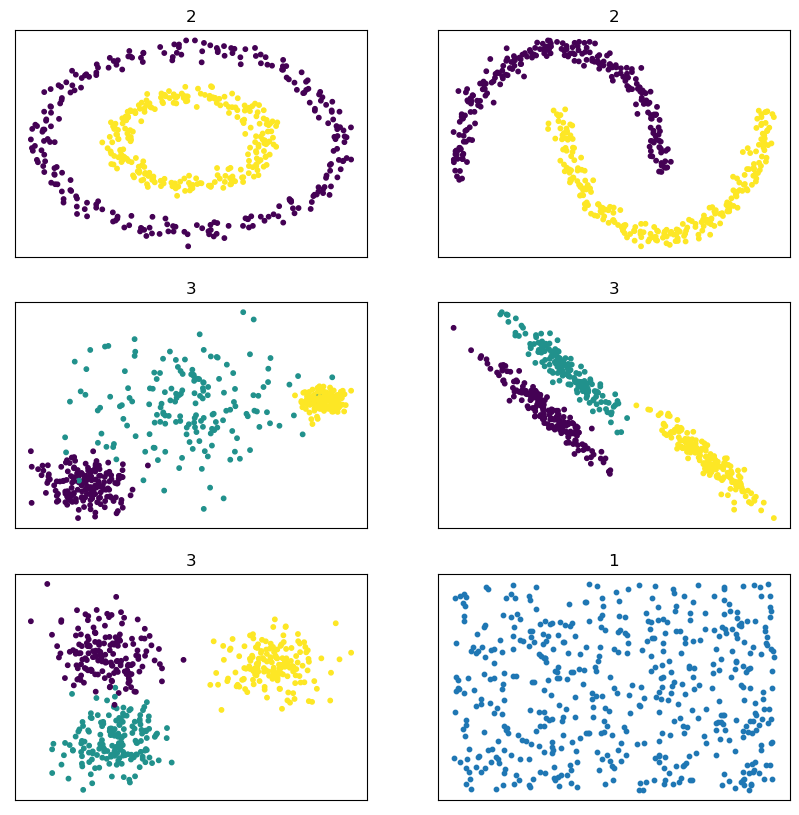

In [3]:
# Plot the generated data
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()
for ax, dataset in zip(axes, datasets_):
    X, y = dataset
    ax.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap="viridis")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("{}".format(len(np.unique(y))))

500
Computing weight matrix...
Weight matrix computed in 0.02331674995366484 seconds.
Starting SSNAL...
Starting ADMM...
ADMM finished in 0.04106195899657905 seconds.
Termination status: Maximum number of iterations reached, iterations: 49
SSNAL terminated in 0.16998754092492163 seconds.
Status: converged, Iterations: 13
Clustering completed in 0.19330429087858647 seconds.
500
Computing weight matrix...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/ssnal.py:339: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/ssnal.py:438: RuntimeWarning: invalid value encountered in double_scalars
  dualinf_ratio = dualinf_hist[itersub] / dualinf_hist[itersub - 1]


Weight matrix computed in 0.020608916995115578 seconds.
Starting SSNAL...
Starting ADMM...
ADMM finished in 0.04422316700220108 seconds.
Termination status: Maximum number of iterations reached, iterations: 49
SSNAL terminated in 0.3387527080485597 seconds.
Status: converged, Iterations: 20
Clustering completed in 0.3593616250436753 seconds.
500
Computing weight matrix...
Weight matrix computed in 0.02062870899681002 seconds.
Starting SSNAL...
Starting ADMM...
ADMM finished in 0.05244204099290073 seconds.
Termination status: Maximum number of iterations reached, iterations: 49
SSNAL terminated in 0.11177483398932964 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.13240354298613966 seconds.
500
Computing weight matrix...
Weight matrix computed in 0.021465249941684306 seconds.
Starting SSNAL...
Starting ADMM...
ADMM finished in 0.050648125004954636 seconds.
Termination status: Maximum number of iterations reached, iterations: 49
SSNAL terminated in 0.3076255830237642 

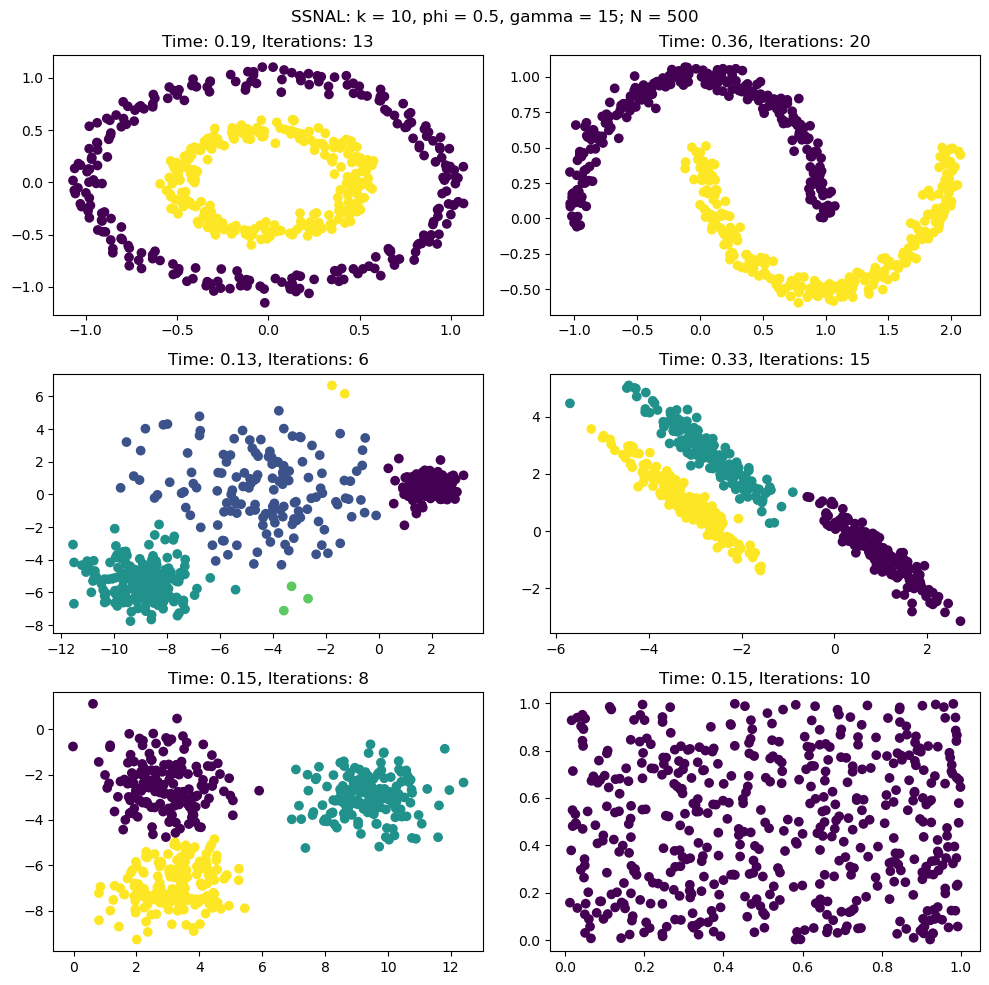

In [3]:
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15)
times = np.zeros(len(datasets_))
iterations = np.zeros(len(datasets_))
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, data in enumerate(datasets_):
    ssnal.fit(data[0])
    times[i] = ssnal.total_time_
    iterations[i] = ssnal.iter_
    axes[i // 2, i % 2].scatter(data[0][:, 0], data[0][:, 1], c=ssnal.labels_)
    axes[i // 2, i % 2].set_title(
        f"Time: {times[i]:.2f}, Iterations: {iterations[i]:.0f}"
    )
fig.suptitle(
    f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}; N = {n_samples}"
)
plt.tight_layout()
plt.show()

Running for 100 samples----------------------------------
Computing weights...
Weights computed in 0.00610833300743252 seconds.
Starting SSNAL...
SSNAL terminated in 0.0386535000288859 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.04476183303631842 seconds.
Computing weights...
Weights computed in 0.005127666983753443 seconds.
Starting SSNAL...
SSNAL terminated in 0.036376875010319054 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.0415045419940725 seconds.
Computing weights...
Weights computed in 0.0053526670089922845 seconds.
Starting SSNAL...
SSNAL terminated in 0.03643729200121015 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.04178995901020244 seconds.
----------------------------------
Running for 500 samples----------------------------------
Computing weights...
Weights computed in 0.024097541987430304 seconds.
Starting SSNAL...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:343: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


SSNAL terminated in 0.08552341698668897 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10962095897411928 seconds.
Computing weights...
Weights computed in 0.024221832980401814 seconds.
Starting SSNAL...
SSNAL terminated in 0.07959012500941753 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10381195798981935 seconds.
Computing weights...
Weights computed in 0.024017042014747858 seconds.
Starting SSNAL...
SSNAL terminated in 0.0788463749922812 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10286341700702906 seconds.
----------------------------------
Running for 1000 samples----------------------------------
Computing weights...
Weights computed in 0.06182750000152737 seconds.
Starting SSNAL...
SSNAL terminated in 0.16244408302009106 seconds.
Status: converged, Iterations: 9
Clustering completed in 0.22427158302161843 seconds.
Computing weights...
Weights computed in 0.045394791988655925 seconds.
Starting SSNAL...
SSNAL termin

/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:442: RuntimeWarning: invalid value encountered in double_scalars
  dualinf_ratio = dualinf_hist[itersub] / dualinf_hist[itersub - 1]


SSNAL terminated in 2.680250375007745 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.160412333032582 seconds.
Computing weights...
Weights computed in 0.5028147920384072 seconds.
Starting SSNAL...
SSNAL terminated in 2.853162292041816 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.355977084080223 seconds.
Computing weights...
Weights computed in 0.5132251660106704 seconds.
Starting SSNAL...
SSNAL terminated in 2.7943217499996535 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.307546916010324 seconds.
----------------------------------
Running for 20000 samples----------------------------------
Computing weights...
Weights computed in 1.016681624983903 seconds.
Starting SSNAL...
SSNAL terminated in 11.975015499978326 seconds.
Status: converged, Iterations: 18
Clustering completed in 12.99169712496223 seconds.
Computing weights...
Weights computed in 0.9964145420235582 seconds.
Starting SSNAL...
SSNAL terminated in 11.50449

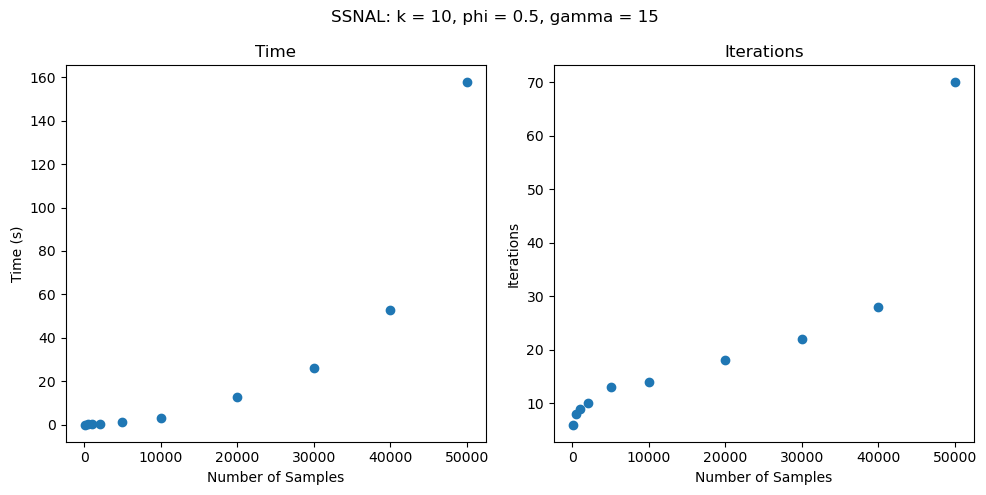

In [7]:
sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]
times = np.zeros(len(sizes))
iterations = np.zeros(len(sizes))
n_fits = 3
for j, n in enumerate(sizes):
    print(f"Running for {n} samples----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n, centers=5, random_state=random_state)
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15)
        labels = ssnal.fit_predict(X)
        times[j] += ssnal.total_time_
        iterations[j] += ssnal.iter_
    times[j] /= n_fits
    iterations[j] /= n_fits
    print("----------------------------------")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(sizes, times)
axes[0].set_title("Time")
axes[0].set_xlabel("Number of Samples")
axes[0].set_ylabel("Time (s)")
axes[1].scatter(sizes, iterations)
axes[1].set_title("Iterations")
axes[1].set_xlabel("Number of Samples")
axes[1].set_ylabel("Iterations")
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}")
plt.tight_layout()
plt.show()

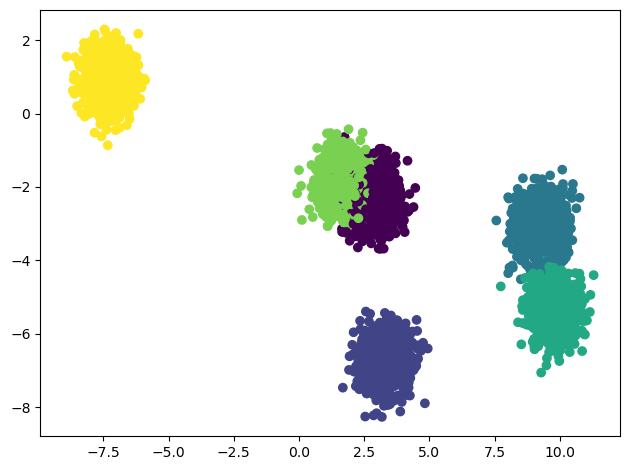

In [4]:
# generate 6 blobs and plot the true clusters
n_samples = 5000
blobs = datasets.make_blobs(
    n_samples=n_samples, random_state=seed, centers=6, cluster_std=0.5
)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
plt.tight_layout()
plt.show()

Computing weights...
Weights computed in 0.04356195800937712 seconds.
Starting SSNAL...
SSNAL terminated in 0.3058887500083074 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.3494507080176845 seconds.
Computing weights...
Weights computed in 0.04499374993611127 seconds.
Starting SSNAL...
SSNAL terminated in 0.27383574994746596 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.3188294998835772 seconds.
Computing weights...
Weights computed in 0.04737225000280887 seconds.
Starting SSNAL...
SSNAL terminated in 0.2762446249835193 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.3236168749863282 seconds.
Computing weights...
Weights computed in 0.04430595797020942 seconds.
Starting SSNAL...
SSNAL terminated in 0.33698566700331867 seconds.
Status: converged, Iterations: 13
Clustering completed in 0.3812916249735281 seconds.
Computing weights...
Weights computed in 0.04384870792273432 seconds.
Starting SSNAL...
SSNAL terminated in 0.

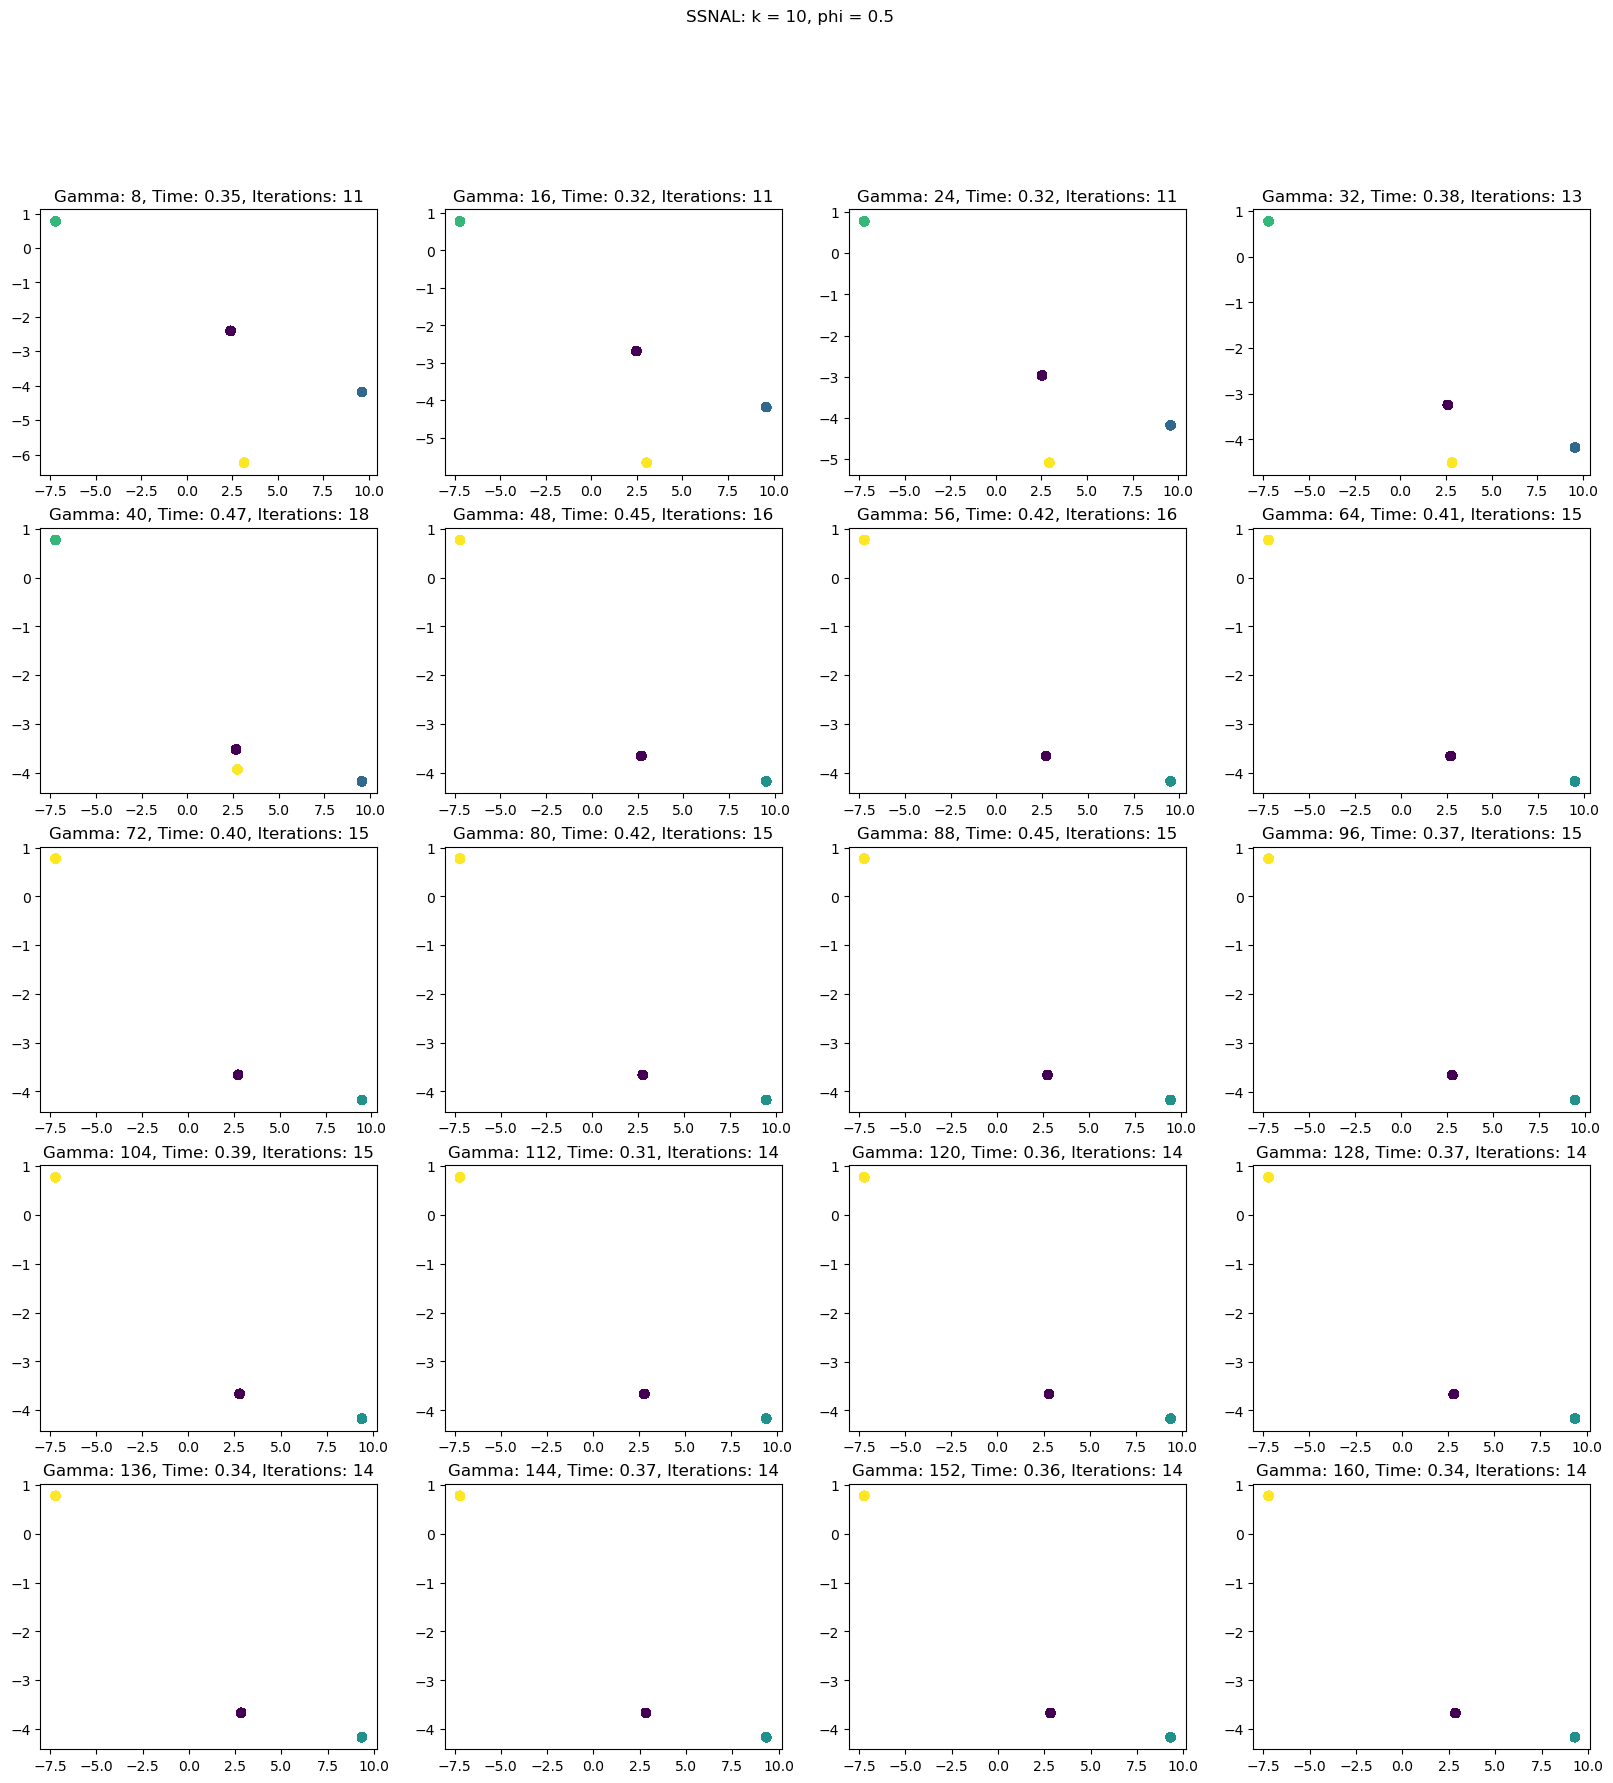

In [14]:
# run ssnal on the blobs with varying gamma from 1 to 20 and plot the results
fig, axes = plt.subplots(5, 4, figsize=(10, 10))
fig.set_size_inches(20, 20)
centers = np.zeros((20, n_samples, 2))
for i in range(20):
    ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=(i + 1) * 8)
    labels = ssnal.fit_predict(blobs[0], save_centers=True)
    centers[i, :, :] = ssnal.centers_.T
    axes[i // 4, i % 4].scatter(ssnal.centers_[0, :], ssnal.centers_[1, :], c=labels)
    axes[i // 4, i % 4].set_title(
        f"Gamma: {(i+1)*8}, Time: {ssnal.total_time_:.2f}, Iterations: {ssnal.iter_:.0f}"
    )
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}")
plt.show()

5000
Computing weight matrix...
Weight matrix computed in 0.21908950002398342 seconds.
Starting ADMM...
ADMM finished in 153.50309791695327 seconds.
Termination status: Maximum number of iterations reached, iterations: 19999
Clustering completed in 153.72218741697725 seconds.
5000
Computing weight matrix...
Weight matrix computed in 0.21855333296116441 seconds.
Starting ADMM...
ADMM finished in 140.16304662497714 seconds.
Termination status: Maximum number of iterations reached, iterations: 19999
Clustering completed in 140.3815999579383 seconds.
5000
Computing weight matrix...
Weight matrix computed in 0.22050658299122006 seconds.
Starting ADMM...
ADMM finished in 14.682762166950852 seconds.
Termination status: Successful convergence, iterations: 2520
Clustering completed in 14.903268749942072 seconds.
5000
Computing weight matrix...
Weight matrix computed in 0.22041366598568857 seconds.
Starting ADMM...
ADMM finished in 8.041586708044633 seconds.
Termination status: Successful conver

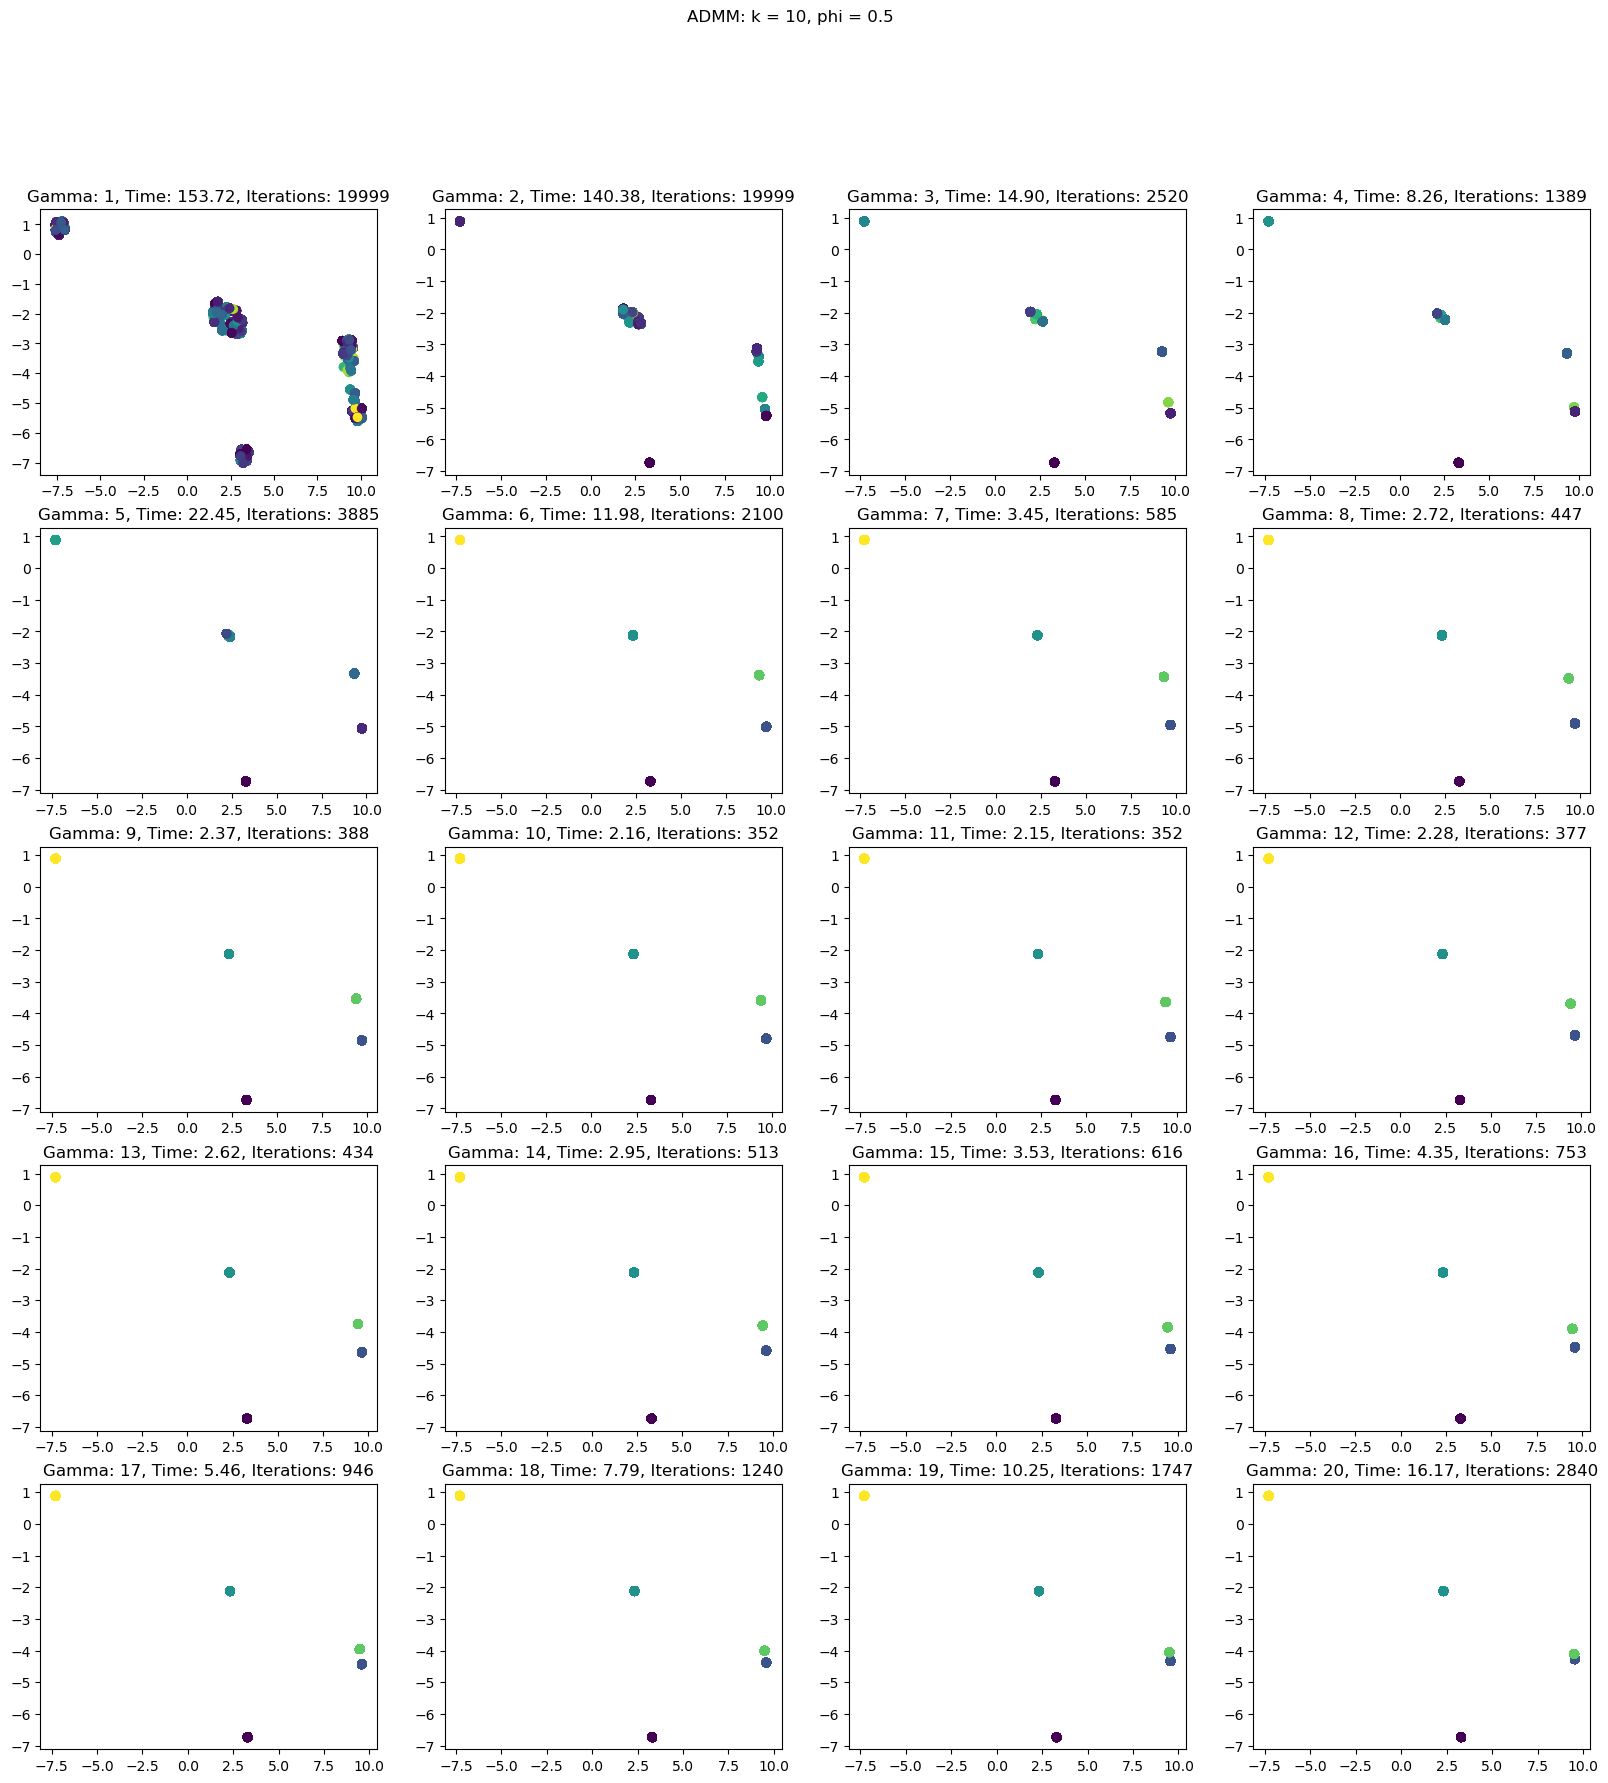

In [6]:
# run ADMM on the blobs with varying gamma from 1 to 20 and plot the results
fig, axes = plt.subplots(5, 4, figsize=(10, 10))
fig.set_size_inches(20, 20)
centers = np.zeros((20, n_samples, 2))
for i in range(20):
    admm = pycvxcluster.pycvxcluster.ADMM(k=10, phi=0.5, gamma=(i + 1))
    labels = admm.fit_predict(blobs[0], save_centers=True)
    centers[i, :, :] = admm.centers_.T
    axes[i // 4, i % 4].scatter(admm.centers_[0, :], admm.centers_[1, :], c=labels)
    axes[i // 4, i % 4].set_title(
        f"Gamma: {i+1}, Time: {admm.total_time_:.2f}, Iterations: {admm.iter_:.0f}"
    )
fig.suptitle(f"ADMM: k = {admm.k}, phi = {admm.phi}")
plt.show()

In [ ]:
# plot both ADMM and SSNAL running time vs number of samples
sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
times_admm = np.zeros(len(sizes))
times_ssnal = np.zeros(len(sizes))
iterations_admm = np.zeros(len(sizes))
iterations_ssnal = np.zeros(len(sizes))
n_fits = 3
for j, n in enumerate(sizes):
    print(f"Running for {n} samples----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n, centers=5, random_state=random_state)
        admm = pycvxcluster.pycvxcluster.ADMM(
            k=10, phi=0.5, gamma=15, verbose=0, maxiter=50000
        )
        labels = admm.fit_predict(X)
        times_admm[j] += admm.total_time_
        iterations_admm[j] += admm.iter_
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15, verbose=0)
        labels = ssnal.fit_predict(X)
        times_ssnal[j] += ssnal.total_time_
        iterations_ssnal[j] += ssnal.iter_
    times_admm[j] /= n_fits
    iterations_admm[j] /= n_fits
    times_ssnal[j] /= n_fits
    iterations_ssnal[j] /= n_fits
    print("----------------------------------")

In [11]:
iterations_admm

array([ 22.,  27.,  31.,  55., 209., 251., 515.])

In [12]:
iterations_ssnal

array([ 6.,  8.,  9., 10., 13., 14., 18.])

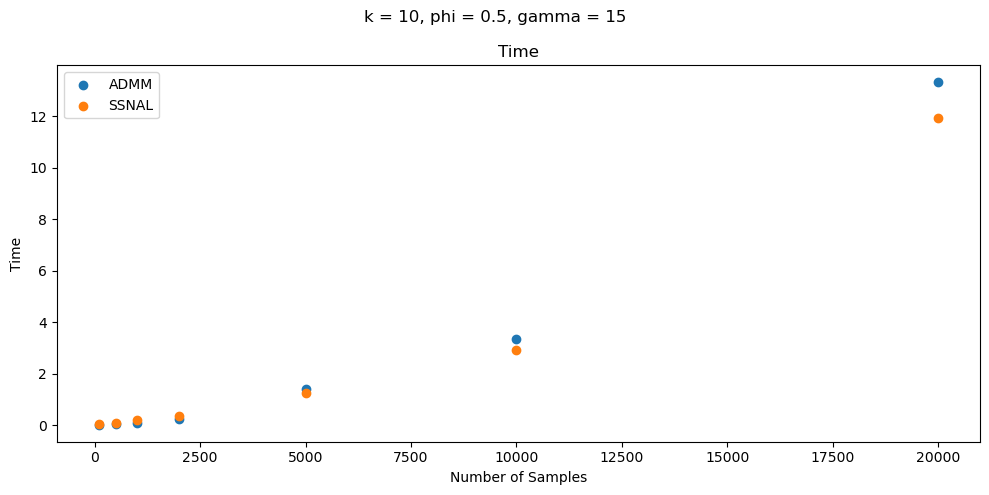

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(sizes, times_admm, label="ADMM")
ax.scatter(sizes, times_ssnal, label="SSNAL")
ax.set_title("Time")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Time")
ax.legend()
fig.suptitle(f"k = {admm.k}, phi = {admm.phi}, gamma = {admm.gamma}")
plt.tight_layout()
plt.show()

Running for 2 dimensions----------------------------------


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)


1
1
1
----------------------------------
Running for 4 dimensions----------------------------------


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/ssnal.py:339: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


1
1
1
----------------------------------
Running for 6 dimensions----------------------------------
1
1
1
----------------------------------
Running for 8 dimensions----------------------------------
1
1
1
----------------------------------
Running for 10 dimensions----------------------------------
1
1
1
----------------------------------
Running for 12 dimensions----------------------------------
1
1
1
----------------------------------
Running for 14 dimensions----------------------------------
1
1
1
----------------------------------
Running for 16 dimensions----------------------------------
1
1
1
----------------------------------
Running for 18 dimensions----------------------------------
1
1
1
----------------------------------
Running for 20 dimensions----------------------------------
1
1
1
----------------------------------
Running for 22 dimensions----------------------------------
1
1
1
----------------------------------
Running for 24 dimensions---------------------------

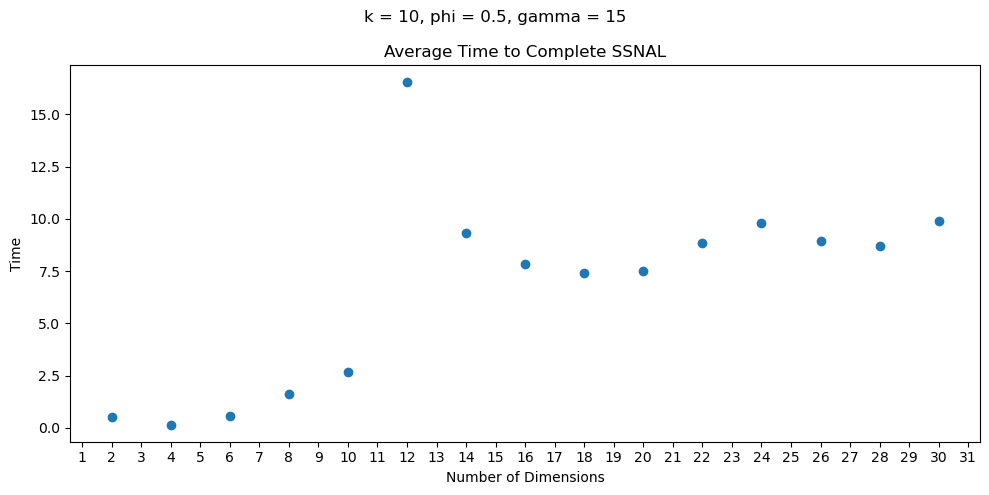

In [6]:
# plot SSNAL varying dimensionality
dims = [x for x in range(2, 31, 2)]
times_ssnal = np.zeros(len(dims))
iterations_ssnal = np.zeros(len(dims))
n_fits = 3
n_samples = 2000
random_state = 12
for j, n in enumerate(dims):
    print(f"Running for {n} dimensions----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n_samples, centers=4, n_features=n, random_state=random_state)
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15, verbose=0)
        labels = ssnal.fit_predict(X)
        times_ssnal[j] += ssnal.ssnal_runtime_
        iterations_ssnal[j] += ssnal.iter_
        print(ssnal.termination_)
    times_ssnal[j] /= n_fits
    iterations_ssnal[j] /= n_fits
    print("----------------------------------")

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(dims, times_ssnal)
ax.set_title("Average Time to Complete SSNAL")
ax.set_xlabel("Number of Dimensions")
ax.set_ylabel("Time")
loc = plticker.MultipleLocator(base=1.0) 
ax.xaxis.set_major_locator(loc)
fig.suptitle(f"k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}")
plt.tight_layout()
plt.show()

Running for 3 dimensions----------------------------------


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/ssnal.py:339: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


1
1
1
----------------------------------
Running for 10 dimensions----------------------------------
1
1
1
----------------------------------
Running for 20 dimensions----------------------------------
1
1
1
----------------------------------
Running for 50 dimensions----------------------------------
1
1
1
----------------------------------
Running for 100 dimensions----------------------------------
1
1
1
----------------------------------
Running for 200 dimensions----------------------------------
1
1
1
----------------------------------
Running for 500 dimensions----------------------------------
1
1
1
----------------------------------
Running for 1000 dimensions----------------------------------
ADMM converged in 1 iterations.
1
ADMM converged in 1 iterations.
1
ADMM converged in 1 iterations.
1
----------------------------------


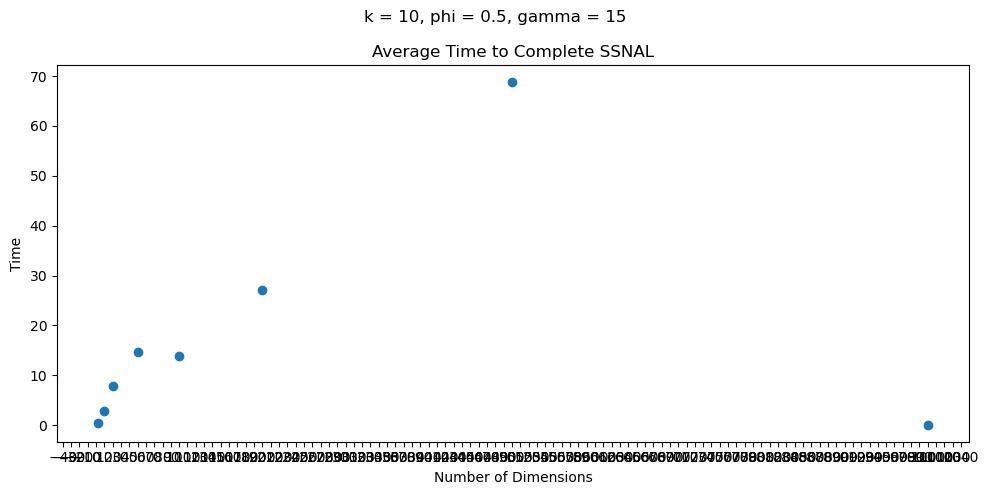

In [11]:
# plot SSNAL varying dimensionality
dims = [3, 10, 20, 50, 100, 200, 500, 1000]
times_ssnal = np.zeros(len(dims))
iterations_ssnal = np.zeros(len(dims))
n_fits = 3
n_samples = 2000
random_state = 12
for j, n in enumerate(dims):
    print(f"Running for {n} dimensions----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n_samples, centers=4, n_features=n, random_state=random_state)
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15, verbose=0)
        labels = ssnal.fit_predict(X)
        times_ssnal[j] += ssnal.ssnal_runtime_
        iterations_ssnal[j] += ssnal.iter_
        print(ssnal.termination_)
    times_ssnal[j] /= n_fits
    iterations_ssnal[j] /= n_fits
    print("----------------------------------")
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(dims, times_ssnal)
ax.set_title("Average Time to Complete SSNAL")
ax.set_xlabel("Number of Dimensions")
ax.set_ylabel("Time")
loc = plticker.MultipleLocator(base=10) 
ax.xaxis.set_major_locator(loc)
fig.suptitle(f"k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}")
plt.tight_layout()
plt.show()


In [2]:
# Compare SSNAL with admm iter and without as n_samples increases
from pycvxcluster.algos.compute_weights import compute_weights
random_state = 12
sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
times_ssnal_no_admm = np.zeros(len(sizes))
times_ssnal_admm = np.zeros(len(sizes))
iterations_ssnal_no_admm = np.zeros(len(sizes))
iterations_ssnal_admm = np.zeros(len(sizes))
n_fits = 3

for j, n in enumerate(sizes):
    print(f"Running for {n} samples----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n, centers=5, random_state=random_state)
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15, verbose=0)
        wv, nam, *_ = compute_weights(X.T, ssnal.k, ssnal.phi, ssnal.gamma)
        ssnal.weight_vec_ = wv
        ssnal.node_arc_matrix_ = nam
        ssnal.admm_iter = 0
        labels = ssnal.fit_predict(X, recalculate_weights=False)
        times_ssnal_no_admm[j] += ssnal.ssnal_runtime_
        iterations_ssnal_no_admm[j] += ssnal.iter_

        ssnal.admm_iter = 50
        labels = ssnal.fit_predict(X, recalculate_weights=False)
        times_ssnal_admm[j] += ssnal.total_time_
        iterations_ssnal_admm[j] += ssnal.iter_
    times_ssnal_no_admm[j] /= n_fits
    iterations_ssnal_no_admm[j] /= n_fits
    times_ssnal_admm[j] /= n_fits
    iterations_ssnal_admm[j] /= n_fits
    print("----------------------------------")


Running for 100 samples----------------------------------
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.005476667080074549 seconds.
Weights computed in 0.006186791928485036 seconds.


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/ssnal.py:339: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)


Computing weights...
Computing weight matrix...
Weight matrix computed in 0.005523999920114875 seconds.
Weights computed in 0.006011916091665626 seconds.
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.005026292055845261 seconds.
Weights computed in 0.005526707973331213 seconds.
----------------------------------
Running for 500 samples----------------------------------
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.021863665897399187 seconds.
Weights computed in 0.023151207948103547 seconds.
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.021006416995078325 seconds.
Weights computed in 0.02221424994058907 seconds.
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.021299292100593448 seconds.
Weights computed in 0.022380458191037178 seconds.
----------------------------------
Running for 1000 samples----------------------------------
Computing weights...
Computing weight matrix

/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/ssnal.py:438: RuntimeWarning: invalid value encountered in double_scalars
  dualinf_ratio = dualinf_hist[itersub] / dualinf_hist[itersub - 1]


Computing weights...
Computing weight matrix...
Weight matrix computed in 0.04311145795509219 seconds.
Weights computed in 0.045057165902107954 seconds.
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.04346383293159306 seconds.
Weights computed in 0.04577495786361396 seconds.
----------------------------------
Running for 2000 samples----------------------------------
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.08815183280967176 seconds.
Weights computed in 0.09217820805497468 seconds.
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.08789941715076566 seconds.
Weights computed in 0.09157916693948209 seconds.
Computing weights...
Computing weight matrix...
Weight matrix computed in 0.08692770800553262 seconds.
Weights computed in 0.09074312495067716 seconds.
----------------------------------
Running for 5000 samples----------------------------------
Computing weights...
Computing weight matrix...
Wei

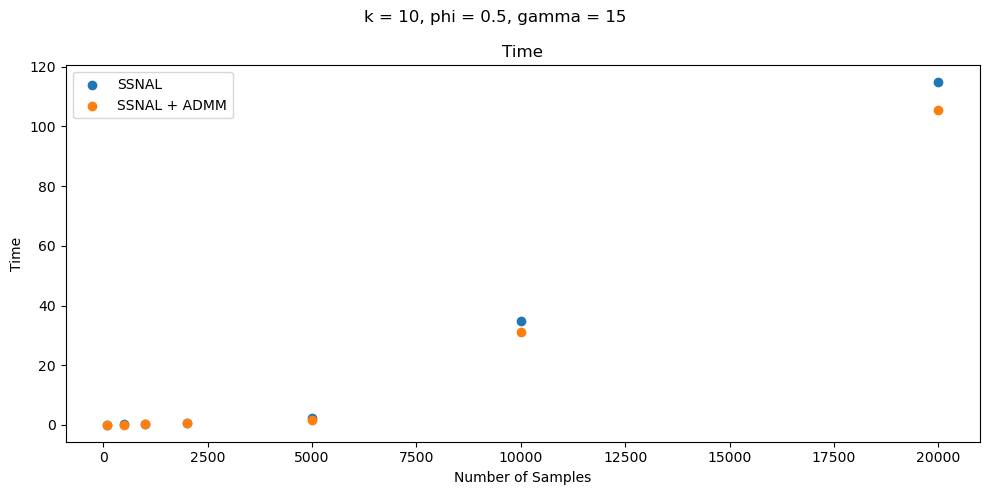

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(sizes, times_ssnal_no_admm, label="SSNAL")
ax.scatter(sizes, times_ssnal_admm, label="SSNAL + ADMM")
ax.set_title("Time")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Time")
ax.legend()
fig.suptitle(f"k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}")
plt.tight_layout()
plt.show()

Running for 2 phi----------------------------------
1
1
1
----------------------------------
Running for 4 phi----------------------------------
1
1
1
----------------------------------
Running for 8 phi----------------------------------
1
1
1
----------------------------------
Running for 16 phi----------------------------------
1
1
1
----------------------------------
Running for 32 phi----------------------------------
1
1
1
----------------------------------
Running for 64 phi----------------------------------
1
1
1
----------------------------------
Running for 128 phi----------------------------------
1
1
1
----------------------------------
Running for 256 phi----------------------------------
1
1
1
----------------------------------
Running for 512 phi----------------------------------
1
1
1
----------------------------------
Running for 1024 phi----------------------------------
1
1
1
----------------------------------
Running for 2048 phi----------------------------------
1
1

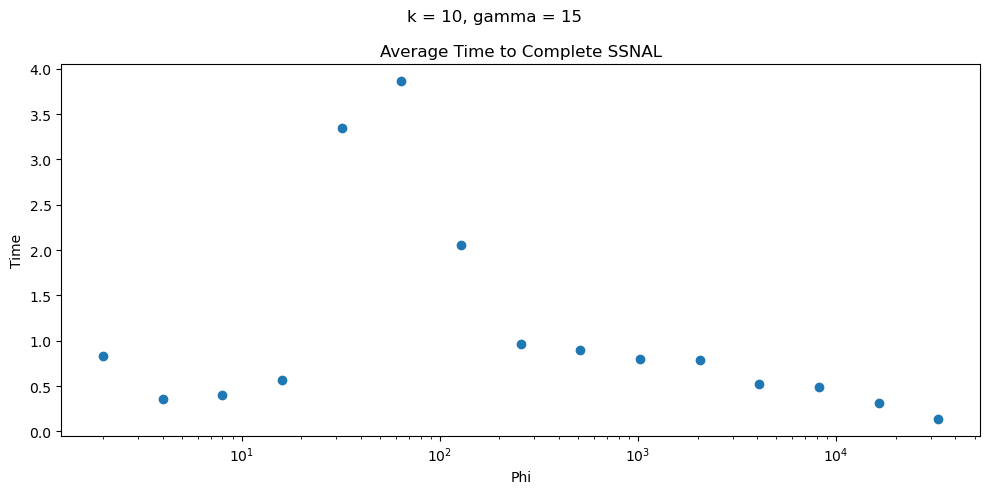

In [10]:
#plot time to complete SSNAL vs phi
phis = [2**x for x in range(1, 16)]
times_ssnal = np.zeros(len(phis))
iterations_ssnal = np.zeros(len(phis))
n_fits = 3
n_samples = 2000
random_state = 12
for j, n in enumerate(phis):
    print(f"Running for {n} phi----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n_samples, centers=4, n_features=2, random_state=random_state)
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=n, gamma=15, verbose=0, admm_iter=100)
        labels = ssnal.fit_predict(X)
        times_ssnal[j] += ssnal.ssnal_runtime_
        iterations_ssnal[j] += ssnal.iter_
        print(ssnal.termination_)
    times_ssnal[j] /= n_fits
    iterations_ssnal[j] /= n_fits
    print("----------------------------------")

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(phis, times_ssnal)
ax.set_title("Average Time to Complete SSNAL")
ax.set_xlabel("Phi")
ax.set_ylabel("Time")
ax.set_xscale('log')
fig.suptitle(f"k = {ssnal.k}, gamma = {ssnal.gamma}")
plt.tight_layout()
plt.show()

In [2]:
from pycvxcluster.algos.compute_weights import compute_weight_matrix
from sklearn.preprocessing import StandardScaler
X = datasets.make_blobs(n_samples=1000, centers=5, n_features=2, random_state=12)[0]
X = StandardScaler().fit_transform(X)
weight_matrix, _ = compute_weight_matrix(X.T, 10, 0.5, 15)

Computing weight matrix...
Weight matrix computed in 0.046653916826471686 seconds.


In [3]:
weight_matrix

<1000x1000 sparse array of type '<class 'numpy.float64'>'
	with 12184 stored elements in Compressed Sparse Row format>

In [4]:
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=1, verbose=0, admm_iter=100)
labels1 = ssnal.fit_predict(X, weight_matrix=.8*weight_matrix, save_centers=True)
centers = ssnal.centers_

/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/ssnal.py:339: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


In [5]:
centers

array([[ 1.18753463, -0.79168981, -0.79168982, ...,  1.18753463,
        -0.79168977, -0.79168982],
       [-1.12627227,  0.75084828,  0.75084829, ..., -1.12627227,
         0.75084821,  0.75084829]])

In [6]:
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=.8, verbose=0, admm_iter=100)
labels2 = ssnal.fit_predict(X, weight_matrix=weight_matrix, save_centers=True)
centers2 = ssnal.centers_

In [7]:
centers2

array([[ 1.18753463, -0.79168981, -0.79168982, ...,  1.18753463,
        -0.79168977, -0.79168982],
       [-1.12627227,  0.75084828,  0.75084829, ..., -1.12627227,
         0.75084821,  0.75084829]])

In [8]:
(labels1 == labels2).all()

True

In [9]:
np.max(centers-centers2)

0.0

In [52]:
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=1, verbose=0, admm_iter=100)
labels3 = ssnal.fit_predict(X, weight_matrix=.8*weight_matrix, save_centers=True)
centers3 = ssnal.centers_

In [53]:
np.max(centers-centers3)

0.0